In [1]:
#install required packages
!pip install textstat
!pip3 install wordfreq
!pip install textblob
!pip install pyspellchecker
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 6.8 MB/s 
     |████████████████████████████████| 2.0 MB 40.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56.8 MB 1.1 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 6.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 7.1 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=c9e2d54809bcc9548d9d0297b861e90cdcab79a84ddf9c176a4c00f2ea641b10
 

In [2]:
#import relevant libraries
import textstat
import wordfreq
#import spacy
import pandas as pd
#from textstat.textstat import textstatistics,legacy_round
from textstat.textstat import textstatistics
import numpy as np
import re
from wordfreq import word_frequency
from wordfreq import zipf_frequency
from wordfreq import tokenize
from wordfreq import get_frequency_dict
from wordfreq import top_n_list
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
from spellchecker import SpellChecker
from autocorrect import Speller

from textblob import TextBlob
from autocorrect import Speller


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read data
data = pd.read_excel("/content/drive/MyDrive/B4/Data/English_Exercises.xlsx")


In [6]:
data.head()

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Instruction,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3
0,10,Flashcards,Learning vocabulary,NaN,1,text,text,NaN,1.0,French,...,NaN,Beauté,Beauty,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,Flashcards,Learning vocabulary,NaN,2,text,text,NaN,2.0,French,...,NaN,Verité,Truth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,Flashcards,Learning vocabulary,NaN,3,text,text,NaN,3.0,French,...,NaN,Liberté,Freedom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Flashcards,Learning vocabulary,NaN,4,text,text,NaN,4.0,French,...,NaN,Fraternité,Brotherhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,Flashcards,Learning vocabulary,NaN,5,text,text,NaN,5.0,French,...,NaN,Bonté,Kindness,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Spellchecker using pyspellchecker
#After little test using pyspellchecker, textblob and autocorrect, pyspellchecker performs better

spell = SpellChecker()
def correct_spelling(text):
    corrected_text = list()
    misspelled_words = spell.unknown(tokenize(text,'en'))
    for word in text.split():
        next_word = word

        if word in misspelled_words:
            next_word = spell.correction(word)
      
        if next_word is not None :
          corrected_text.append(next_word)
        else:
          corrected_text.append(word)
        
  
    return " ".join(corrected_text)

In [9]:
#second package which performs well is autocorrect
#we pass the code through 2 spellcheckers to create an idea of an "ensemble"
speller = Speller(lang='en')

def autocorrect_speller(text):
  return speller(text)

In [10]:
#example pyspellchecker
text_misspelled = "I realli needt smoe corection. This sentnce has mispelled wirds"
correct_spelling(text_misspelled)


'I really need some corection. This sentence has misspelled words'

In [11]:
#still some errors, so pass another spellchecker
corrected_1 = correct_spelling(text_misspelled)
autocorrect_speller(corrected_1)

'I really need some correction. This sentence has misspelled words'

In [12]:
data["Exo_objective"].unique()

array(['Learning vocabulary', nan, 'Grammar', 'Verb_Conjugation'],
      dtype=object)

In [13]:
#select non na sentences
df = data[data['Full_sentence'].notna()]



In [14]:
#subset exo objective for vocabularis
df_vocab = df[df["Exo_objective"]=="Learning vocabulary"]

In [15]:
#spellchecks for vocabularies
df_vocab["Right_answer"]=df_vocab["Right_answer"].apply(lambda x:correct_spelling(x))
df_vocab["Right_answer"]=df_vocab["Right_answer"].apply(lambda x:autocorrect_speller(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#subset exo objective for grammar
df_gram = df[df["Exo_objective"]=="Grammar"]

In [18]:

def fill_blank(blank_sentence):
    """
    Replace ... with contents from brackets i.e answer
    Remove content inside parentheses
    Remove parentheses

    """
    answer = blank_sentence[blank_sentence.find("(")+1:blank_sentence.find(")")]

    return re.sub("\(.*?\)","()", blank_sentence.replace("...", answer)).replace('(','').replace(')','')

In [19]:
#fill sentences when there are blanks 
df_gram["Full_sent2"] = df_gram["Sentence_w_blank"].apply(lambda x:fill_blank(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
#spellchecks for grammar
df_gram["Full_sent2"] = df_gram["Full_sent2"].apply(lambda x:correct_spelling(x))
df_gram["Full_sent2"] = df_gram["Full_sent2"].apply(lambda x:autocorrect_speller(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#subset nan type exos
df_nan = df[df['Exo_objective'].isna()]


In [22]:
#select non NaNs
df_nan = df_nan[df_nan["Right_answer"].notna()]

In [23]:
#spellcheck
df_nan["Right_answer"] = df_nan["Right_answer"].apply(lambda x:correct_spelling(x))
df_nan["Right_answer"] = df_nan["Right_answer"].apply(lambda x:autocorrect_speller(x))

In [24]:
#subset dataset where verb conjugation is objective
df_verb = df[df["Exo_objective"]=='Verb_Conjugation']

In [25]:
#pre-process data like grammar
df_verb["Full_sent2"] = df_verb["Sentence_w_blank"].apply(lambda x:fill_blank(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#spell check 
df_verb["Full_sent2"] = df_verb["Full_sent2"].apply(lambda x:correct_spelling(x))
df_verb["Full_sent2"] = df_verb["Full_sent2"].apply(lambda x:autocorrect_speller(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


NEW STRATEGY :
The score is calculated as a multiplication of length of the word
and the number of occurrences in the text. In this approach the most dicult
word (the lowest score) is a combination of being long and occur least times. If
two words have similar frequency score, the longer one will now become more
dicult. In all cases the score is calculated as relative within the available text.

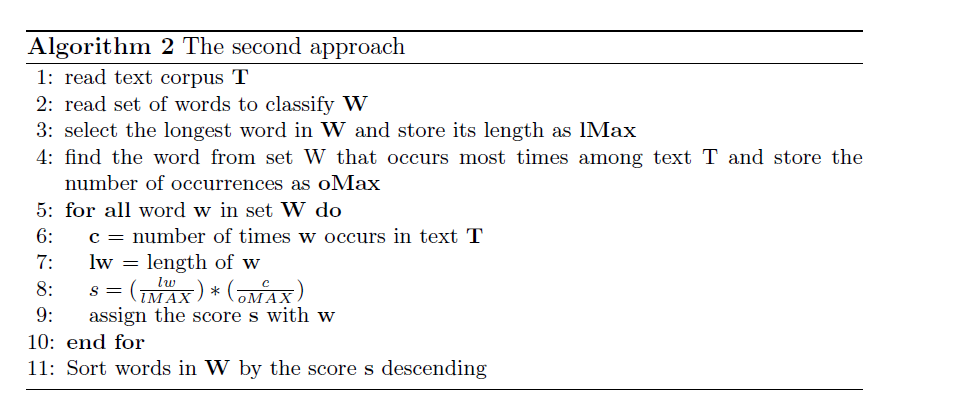

Source : https://www.researchgate.net/publication/322996917_Assessing_Word_Difficulty_for_Quiz-Like_Game

Adjustments :


- Usage of `zipf_frequency` from `word_freq` library instead of number of occurences which allows to skip the reading of bulky corpuses and have a standardized scale
- Change in the score formula:
> s = (lw/lmax) * (8 - zipf)



### Obtain a list of tokens


In [28]:
#create a dataframe for tokens
df_tokens =pd.DataFrame()

In [27]:
#create function to add to token list
token_list = []
def tokenize_wordfreq(x):
    
    token_list.extend(tokenize(x,'en'))
    return tokenize(x,'en')

In [29]:
#get tokens from all dfs
df_tokens["unigrams"] = df_vocab["Right_answer"].apply(tokenize_wordfreq)
df_tokens["unigrams"] = df_gram["Full_sent2"].apply(tokenize_wordfreq)
df_tokens["unigrams"] = df_verb["Full_sent2"].apply(tokenize_wordfreq)
df_tokens["unigrams"] = df_nan["Right_answer"].apply(tokenize_wordfreq)


In [30]:
#get unique list of tokens 
token_list = list(set(token_list))

 ### Calculation of word difficulty

In [31]:
#find longest word in token list
max(token_list, key=len)

'gastroenterologist'

In [32]:
#store length of word
lmax = len(max(token_list, key=len))

In [33]:
#word with highest zipf from word_freq
top_n_list('en', 1, wordlist='best')

['the']

In [34]:
zipf_frequency('the','en')

7.73

In [35]:
#store highest zipf
omax = zipf_frequency('the','en')

In [36]:
#create new df to find difficulty of each word
data ={"word":token_list}
df_word_diff = pd.DataFrame(data)

In [39]:

def find_word_difficulty(word):
    lmax = len(max(token_list, key=len))
    length_word = len(word)
    zipf_word = zipf_frequency(word,'en')
    relative_length = length_word/lmax
    relative_freq = (8- zipf_word)
    score = relative_length * relative_freq
    return pd.Series([length_word, zipf_word,score])

In [40]:
#calculate difficulty of each word
df_word_diff[['length','zipf_freq','score']] = df_word_diff['word'].apply(find_word_difficulty)


In [41]:
#sort dataframe by ascending order
#higher score means harder word and vice versa
df_word_diff.sort_values(by='score',ascending=True,inplace=True,ignore_index=True)


In [44]:
df_word_diff

,word,length,zipf_freq,score
0,a,1.0,7.36,0.035556
1,the,3.0,7.73,0.045000
2,i,1.0,7.09,0.050556
3,to,2.0,7.43,0.063333
4,of,2.0,7.40,0.066667
...,...,...,...,...
8028,spectrophotometer,17.0,2.05,5.619444
8029,hypermetropic,13.0,0.00,5.777778
8030,gastroenterologist,18.0,2.22,5.780000
8031,clandestineness,15.0,0.00,6.666667


### Transformation of word difficulty score into Gaussian

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f195073a1d0>]],
      dtype=object)

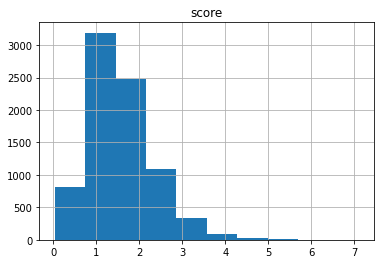

In [45]:
df_word_diff.hist(column='score')


In [46]:
#### If you want to check whether feature is gaussian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

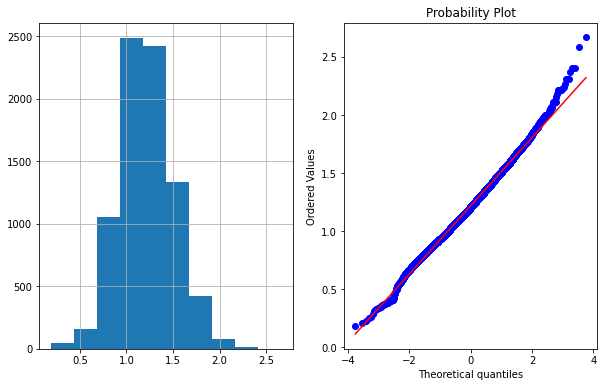

In [47]:
##### Square Root Transformation
df_word_diff['sqrt_score']=df_word_diff.score**(1/2)
plot_data(df_word_diff,'sqrt_score')

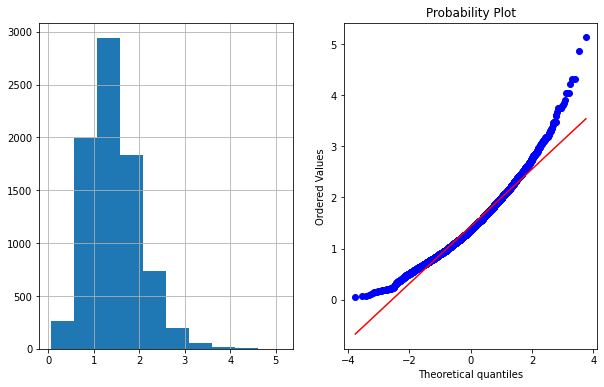

In [48]:
#### Exponential Transformation
df_word_diff['expo_score']=df_word_diff.score**(1/1.2)

plot_data(df_word_diff,'expo_score')

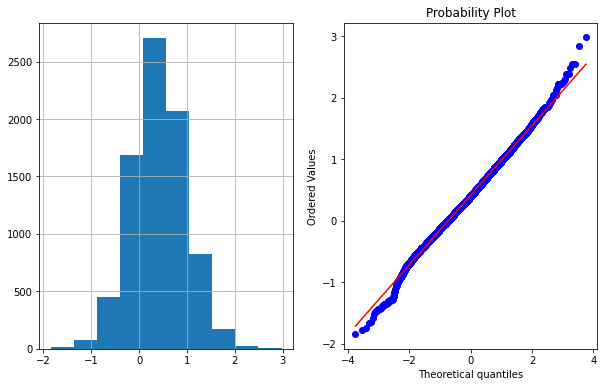

In [49]:
#### Boxcox Transformation
df_word_diff['box_score'],parameters=stat.boxcox(df_word_diff['score'])
plot_data(df_word_diff,'box_score')


### Separating difficulties into quantiles

In [51]:
#separate into 32 quantiles because of 2^n rule of thumb for n = 5 (5 levels)
number_of_quantile = 32
#We get the quantiles from 0 to the defined number where 0 is for the lowest quantile of y_proba
# edges represents the boundaries due that we specified retbins=True 
df_word_diff['quantile'], edges = pd.qcut(x=df_word_diff['box_score'], q=number_of_quantile, labels=False, retbins=True)

In [52]:
df_word_diff.head()

,word,length,zipf_freq,score,sqrt_score,expo_score,box_score,quantile
0,a,1.0,7.36,0.035556,0.188562,0.062004,-1.842079,0
1,the,3.0,7.73,0.045000,0.212132,0.075453,-1.777034,0
2,i,1.0,7.09,0.050556,0.224846,0.083139,-1.742557,0
3,to,2.0,7.43,0.063333,0.251661,0.100314,-1.671080,0
4,of,2.0,7.40,0.066667,0.258199,0.104695,-1.653890,0


In [54]:
df_word_diff["level"] = np.nan

In [55]:
for i in df_word_diff.index:
    if df_word_diff['quantile'][i] <=1:
        df_word_diff['level'][i] = 'A1'
    if df_word_diff['quantile'][i] >1 and df_word_diff['quantile'][i] <=3:
        df_word_diff['level'][i] = 'A2'
    if df_word_diff['quantile'][i] >3 and df_word_diff['quantile'][i] <=7:
        df_word_diff['level'][i] = 'B1'
    if df_word_diff['quantile'][i] >7and df_word_diff['quantile'][i] <=15:
        df_word_diff['level'][i] = 'B2'
    if df_word_diff['quantile'][i] > 15 :
        df_word_diff['level'][i] = 'C1'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Calculate sentence difficulty score

>   Sentence = number of words in sentence(sentence length) * average of word difficulty in sentence * rarest word in sentence


In [53]:
def avg_sentence_length( text: str) -> float:
      """Calculate the average sentence length.
      This function is a combination of the functions `lexicon_count` and
      `sentence_count`.
      Parameters
      ----------
      text : str
          A text string.
      Returns
      -------
      float
          The average sentence length.
      """
      try:
          asl = float(textstat.lexicon_count(text) / textstat.sentence_count(text))
          return np.round(asl, 1)
      except ZeroDivisionError:
          return 0.0

In [61]:
def find_wLengthMax(text):
  
  """
  Find the longest word in the sentence
  """
  word_list = list(set(re.findall(r"[\w\='‘’]+", text.lower())))
  longest_word =  len(max(word_list, key=len))
  return longest_word
  

In [62]:
def find_wSRarest(text):
    
  """
  Find the rarest word in the sentence but since rarest words have lower zipf and we want rarest words to have more difficulty weight we do:
  8 - zipf
  """
  word_freq = []

  word_list = list(set(re.findall(r"[\w\='‘’]+", text.lower())))
  for word in word_list:
    word_freq.append(zipf_frequency(word,'en'))
  if len(word_freq) != 0:
    wSRarest = 8 - min(word_freq)
  else:
    wSRarest = 8 - 0
  return wSRarest

In [63]:
#list of all words in the dataset having a difficulty
df_word_diff_list = df_word_diff["word"].unique()

In [66]:
def find_wSavg(text):
  """
  Find the average difficulty of the words in a sentence
  """
  avg_word_diff = []
  word_list = list(set(re.findall(r"[\w\='‘’]+", text.lower())))
  for word in word_list:
    if word in df_word_diff_list:
      avg_word_diff.append(df_word_diff[df_word_diff["word"]==word]["score"].values[0])
  wSavg = np.mean(avg_word_diff)
  return wSavg


In [67]:
def find_SScore(text):
    
  """
  Calculate the sentence difficulty score
  """
  sscore = avg_sentence_length(text) * find_wSavg(text) * find_wSRarest(text)
  return sscore

In [68]:
#calculate difficulty
df_vocab["Difficulty"] = df_vocab["Right_answer"].apply(lambda x:find_SScore(x))
df_gram["Difficulty"] = df_gram["Full_sent2"].apply(lambda x:find_SScore(x))
df_nan["Difficulty"] = df_nan["Right_answer"].apply(lambda x:find_SScore(x))
df_verb["Difficulty"] = df_verb["Full_sent2"].apply(lambda x:find_SScore(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWar

In [72]:
# #drop column of complete sentence to ensure data format 
df_verb = df_verb.drop(columns=['Full_sent2'])
df_gram = df_gram.drop(columns=['Full_sent2'])


In [69]:
#stack all datasets together
final_df = pd.concat([df_vocab,df_gram,df_nan, df_verb], ignore_index=True, axis=0)



In [73]:
final_df.head()

,Exo_type_id,Exo_type,Exo_objective,Exo_focus,Exo_id,Source_format,Target_format,Source_sentence_id,Source_word_id,Source_lang,...,Sentence_w_blank,Right_answer,Options,Explanation,Difficulty,Remediation,dist_1,dist_2,dist_3,Full_sent2
0,10,Flashcards,Learning vocabulary,NaN,1,text,text,NaN,1.0,French,...,Beauté,Beauty,NaN,NaN,3.520833,NaN,NaN,NaN,NaN,NaN
1,10,Flashcards,Learning vocabulary,NaN,2,text,text,NaN,2.0,French,...,Verité,Truth,NaN,NaN,2.417361,NaN,NaN,NaN,NaN,NaN
2,10,Flashcards,Learning vocabulary,NaN,3,text,text,NaN,3.0,French,...,Liberté,Freedom,NaN,NaN,3.834289,NaN,NaN,NaN,NaN,NaN
3,10,Flashcards,Learning vocabulary,NaN,4,text,text,NaN,4.0,French,...,Fraternité,Brotherhood,NaN,NaN,10.524861,NaN,NaN,NaN,NaN,NaN
4,10,Flashcards,Learning vocabulary,NaN,5,text,text,NaN,5.0,French,...,Bonté,Kindness,NaN,NaN,7.111111,NaN,NaN,NaN,NaN,NaN


### Find sentence levels based on its difficulty (A1 - C1) - To be done

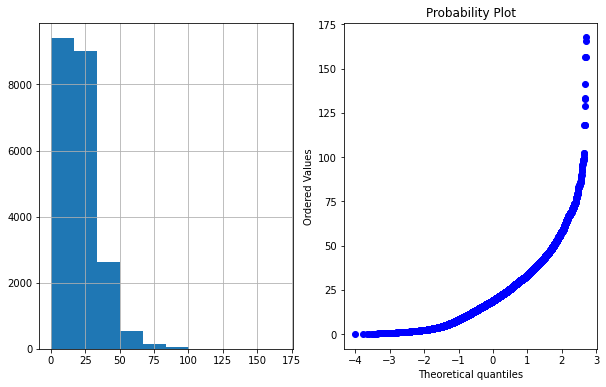

In [74]:
plot_data(final_df,"Difficulty")

### Export final dataset to csv

In [ ]:
final_df.to_csv("/content/drive/MyDrive/B4/Data/English_Exercises_diff.csv",index=False)